bathrooms : {'None'}
sqrt_ft : {'None'}
garage : {'None'}
HOA : {'2,000', '8,333', '1,000', '1,100', '1,769', '1,010', '1,270', '5,900', '1,600', '1,200', '1,717', 'None', '19,480', '1,290', '20,000'}
sold_price : 0
longitude : 0
latitude : 0
lot_acres : 35
taxes : 22
year_built : 5
bedrooms : 0
bathrooms : 0
sqrt_ft : 29
garage : 191
fireplaces : 303
HOA : 1380
sold_price    413500.000000
longitude          0.194071
latitude           0.190238
lot_acres          2.935000
taxes           5530.380000
year_built        30.000000
bedrooms           2.000000
bathrooms          2.000000
sqrt_ft         1771.000000
garage             1.000000
fireplaces         2.000000
HOA              158.000000
dtype: float64


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:93: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`


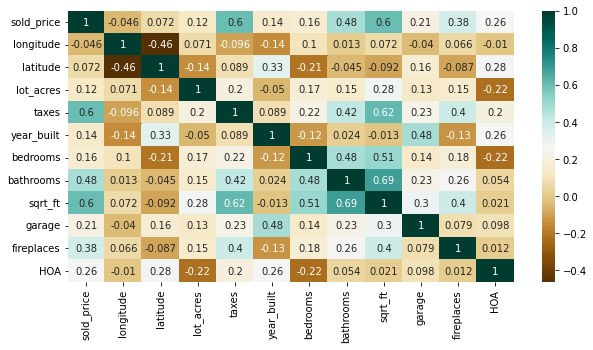

In [34]:
from google.colab import files
import pandas as pd
import numpy as np
import seaborn as sns                       
import matplotlib.pyplot as plt  

# store the data on colab, only need to run this once
#cvs_file = files.upload()

# store the data as pandas dataframe
raw_data = pd.read_csv("/content/raw_house.csv")

raw_data.head(5)

df = raw_data.drop(["MLS","zipcode"],axis = 1)
#df.head(5)

df.dtypes

# inputs - pandas dataframe, list of column names
# output - dict containing set of unique non-numeric values for each column
def get_unique_non_number_values (data, col_names):
  
  unique_values_dict = {}
  
  for i in col_names:
    
    unique_values_dict[i] = set()
    
    for j in data[i]:
      # try if the value can be changed into a float
      try:
        float(j)
      # if float function produces an error, than the value is non-numeric so store it in the dict
      except:
        unique_values_dict[i].add(j)
    
  return unique_values_dict

non_numeric_col = ["bathrooms","sqrt_ft","garage","HOA"]
non_numeric = get_unique_non_number_values(df,non_numeric_col)
# print dict
for i in non_numeric:
  print( "{} : {}".format(i,non_numeric[i]))

  # remove commas from numeric values

for i in non_numeric_col:
  for j in range(len(df[i])):
    temp = raw_data[i][j]
    try:
      float(temp)
    except:
      if temp == "None":
        df.at[j,i] = 0
      else:
        df.at[j,i] = temp.replace(",","")
  df[i] = pd.to_numeric(df[i])


df.count()

df= df.dropna()
df.count()

col_with_num_keys = list(df.keys())
# remove columns with string
col_with_num_keys.remove("kitchen_features")
col_with_num_keys.remove("floor_covering")


Q1 = df.quantile(0.15,interpolation = 'midpoint')
Q3 = df.quantile(0.85,interpolation = 'midpoint')
IQR = Q3-Q1
print(IQR)
df = df

df = df[~((df < (Q1 - 2 * IQR)) |(df > (Q3 + 2 * IQR))).any(axis=1)]
df.shape


plt.figure(figsize=(10,5))
c= df.corr()
sns.heatmap(c,cmap="BrBG",annot=True)
df = df.drop(["longitude","latitude"],axis = 1)
